In [167]:
from skimage import measure, io, img_as_ubyte
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from skimage.color import label2rgb, rgb2gray
import numpy as np
import cv2


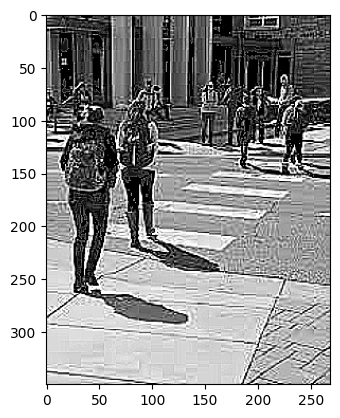

In [257]:
img = cv2.imread("/content/image01.png", 0)

sharpening_filter = np.array([[-1,-1,-1],
                             [-1, 9 , -1],
                             [-1,-1,-1]])

#kernel_size = np.ones((5, 5), float) / 25

image = cv2.filter2D(img, -1, sharpening_filter)

#image = cv2.filter2D(img, -1, kernel_size)

#image = cv2.equalizeHist(image)
plt.imshow(image, cmap='gray')
scale = 0.6 #microns/pixel

In [258]:
from skimage.filters import threshold_otsu
threshold = threshold_otsu(image)
plt

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

In [259]:
import matplotlib.image as mpimg
from matplotlib.pyplot import imshow
%matplotlib inline

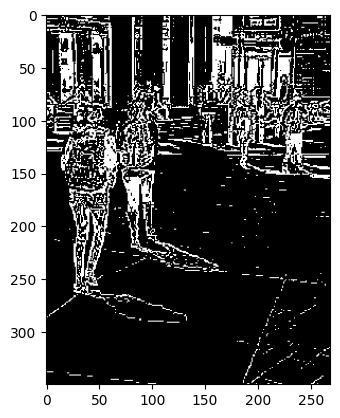

In [260]:
thresholded_img = image < 19

#thresholded_img = image < threshold
plt.imshow(thresholded_img, cmap='gray')


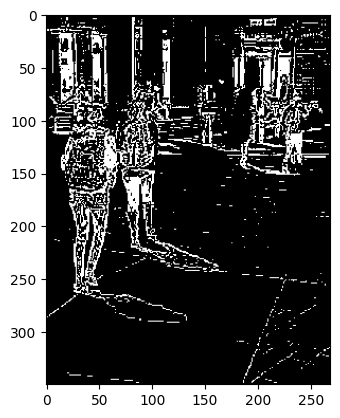

In [261]:
from skimage.segmentation import clear_border
edge_touching_removed = clear_border(thresholded_img)
plt.imshow(edge_touching_removed, cmap='gray')

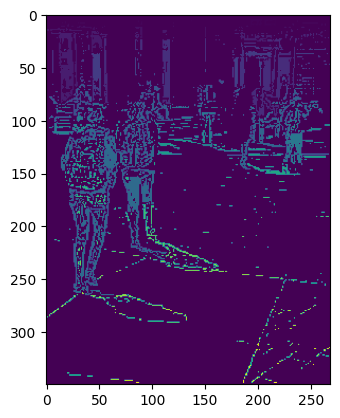

In [262]:
label_image = measure.label(edge_touching_removed, connectivity=image.ndim)

plt.imshow(label_image)

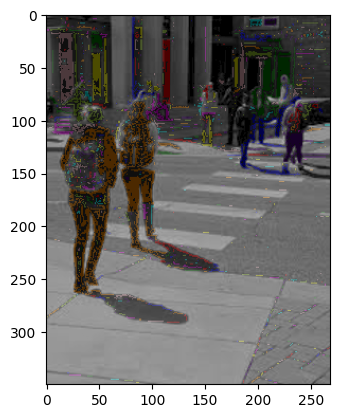

In [263]:
image_label_overlay = label2rgb(label_image, image=img)
plt.imshow(image_label_overlay)

In [264]:
all_props=measure.regionprops(label_image, image)

In [265]:
for prop in all_props:
    print('Label: {} Area: {}'.format(prop.label, prop.area))

Label: 1 Area: 6
Label: 2 Area: 197
Label: 3 Area: 1
Label: 4 Area: 4
Label: 5 Area: 1
Label: 6 Area: 50
Label: 7 Area: 1
Label: 8 Area: 50
Label: 9 Area: 1
Label: 10 Area: 1
Label: 11 Area: 2
Label: 12 Area: 1
Label: 13 Area: 2
Label: 14 Area: 2
Label: 15 Area: 4
Label: 16 Area: 1
Label: 17 Area: 1
Label: 18 Area: 5
Label: 19 Area: 1
Label: 20 Area: 15
Label: 21 Area: 5
Label: 22 Area: 3
Label: 23 Area: 2
Label: 24 Area: 2
Label: 25 Area: 4
Label: 26 Area: 2
Label: 27 Area: 18
Label: 28 Area: 1
Label: 29 Area: 1
Label: 30 Area: 2
Label: 31 Area: 5
Label: 32 Area: 1
Label: 33 Area: 29
Label: 34 Area: 10
Label: 35 Area: 1
Label: 36 Area: 2
Label: 37 Area: 2
Label: 38 Area: 2
Label: 39 Area: 3
Label: 40 Area: 22
Label: 41 Area: 4
Label: 42 Area: 1
Label: 43 Area: 1
Label: 44 Area: 4
Label: 45 Area: 14
Label: 46 Area: 3
Label: 47 Area: 5
Label: 48 Area: 1
Label: 49 Area: 2
Label: 50 Area: 11
Label: 51 Area: 1
Label: 52 Area: 2
Label: 53 Area: 1
Label: 54 Area: 4
Label: 55 Area: 117
Label:

In [266]:
props = measure.regionprops_table(label_image, image,
                          properties=['label',
                                      'area', 'equivalent_diameter',
                                      'mean_intensity', 'solidity'])

In [267]:
import pandas as pd
df = pd.DataFrame(props)
print(df.head())

   label  area  equivalent_diameter  mean_intensity  solidity
0      1     6             2.763953        5.666667  1.000000
1      2   197            15.837556        1.162437  0.358834
2      3     1             1.128379        0.000000  1.000000
3      4     4             2.256758        4.750000  1.000000
4      5     1             1.128379        0.000000  1.000000


In [268]:
df = df[df['area'] > 50]
print(df.head())

    label  area  equivalent_diameter  mean_intensity  solidity
1       2   197            15.837556        1.162437  0.358834
54     55   117            12.205287        0.769231  0.639344
58     59   573            27.010484        0.675393  0.547801
59     60    80            10.092530        2.162500  0.509554
61     62    91            10.764051        3.131868  0.446078


In [269]:
df['area_sq_microns'] = df['area'] * (scale**2)
df['equivalent_diameter_microns'] = df['equivalent_diameter'] * (scale)
print(df.head())

    label  area  equivalent_diameter  mean_intensity  solidity  \
1       2   197            15.837556        1.162437  0.358834   
54     55   117            12.205287        0.769231  0.639344   
58     59   573            27.010484        0.675393  0.547801   
59     60    80            10.092530        2.162500  0.509554   
61     62    91            10.764051        3.131868  0.446078   

    area_sq_microns  equivalent_diameter_microns  
1             70.92                     9.502534  
54            42.12                     7.323172  
58           206.28                    16.206291  
59            28.80                     6.055518  
61            32.76                     6.458431  
